In [1]:
import pandas as pd

df = pd.read_csv("train.csv") 

from IPython.display import display
display(df.head(20))

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0
5,5,6,1022.7,20.6,18.6,16.5,12.5,79.0,81.0,0.0,20.0,15.7,1
6,6,7,1022.8,19.5,18.4,15.3,11.3,56.0,46.0,7.6,20.0,28.4,0
7,7,8,1019.7,15.8,13.6,12.7,11.8,96.0,100.0,0.0,50.0,52.8,1
8,8,9,1017.4,17.6,16.5,15.6,12.5,86.0,100.0,0.0,50.0,37.5,1
9,9,10,1025.4,16.5,14.4,12.0,8.6,77.0,84.0,1.0,50.0,38.3,0


In [2]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["rainfall", "id"])
y = df["rainfall"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [3]:
from sklearn.linear_model import LogisticRegression
rf_model = LogisticRegression(max_iter=50000, random_state=2183)

# from sklearn.ensemble import RandomForestClassifier
# rf_model = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=41)

# from sklearn.ensemble import GradientBoostingClassifier
# rf_model = GradientBoostingClassifier(subsample=0.6, n_estimators = 1000, learning_rate=0.01, max_features='sqrt', random_state=48)

# import xgboost as xgb
# from xgboost import XGBClassifier
# rf_model = XGBClassifier(n_estimators=1000, reg_lambda=100, learning_rate=0.01, colsample_bytree=0.6, random_state=14)

rf_model.fit(X_train, y_train)

LogisticRegression(max_iter=50000, random_state=2183)

In [4]:
from sklearn.metrics import roc_auc_score, roc_curve

preds = rf_model.predict_proba(X_test)[:,1]

train_auc = roc_auc_score(y_train, rf_model.predict_proba(X_train)[:, 1])
test_auc = roc_auc_score(y_test, preds) 

print(f"Train AUC: {train_auc:.4f}")
print(f"Test AUC: {test_auc:.4f}")

Train AUC: 0.9028
Test AUC: 0.8727


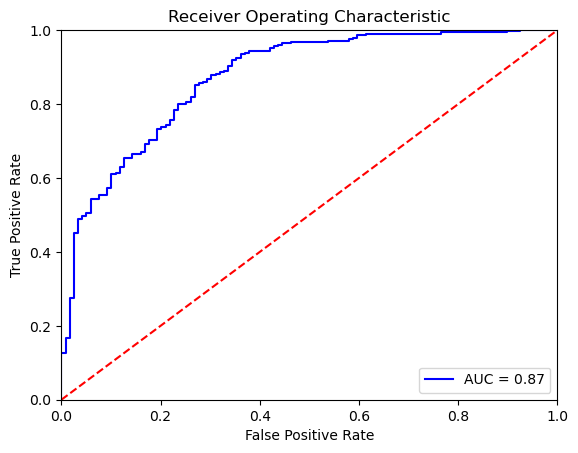

In [5]:
# plotting ROC curve

import sklearn.metrics as metrics

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [6]:
test_df = pd.read_csv("test.csv")

X = test_df
X_df = pd.DataFrame(X)

# removing rows with NaN values
X_df['winddirection'].fillna(df['winddirection'].median(), inplace=True)

id_df = X_df.pop('id')
y = rf_model.predict_proba(X_df)[:,1]

submission = pd.DataFrame({
    'id': id_df,
    'rainfall': y.flatten()
})

In [7]:
num_rows = submission.shape[0]
print(num_rows)

#save
submission.to_csv('submission.csv', index=False)

730


In [8]:
submission

,id,rainfall
0,2190,0.980713
1,2191,0.982361
2,2192,0.916590
3,2193,0.106020
4,2194,0.028964
...,...,...
725,2915,0.973858
726,2916,0.898064
727,2917,0.975181
728,2918,0.986613
